In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Import

In [441]:
df=pd.read_csv('/content/Loan-Approval-Prediction.csv')

In [442]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Cleaning

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [444]:
df['Credit_History']=df['Credit_History'].astype('category')

In [445]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [446]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [447]:
df.duplicated().sum()

0

In [448]:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(inplace=True,drop=True)
len(df)

614

In [449]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [453]:
for i in df.select_dtypes(include=['object','category']).columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [454]:
for i in df.select_dtypes(include=['object','category']).columns:
    print(i)
    print(df[i].unique())

Gender
['Male' 'Female']
Married
['No' 'Yes']
Dependents
['0' '1' '2' '3+']
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes']
Credit_History
[1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
Property_Area
['Urban' 'Rural' 'Semiurban']
Loan_Status
['Y' 'N']


In [455]:
for i in df.iloc[:,:-1].select_dtypes(include=['int64','float64']).columns:
    df[i]=df[i].fillna(df[i].mean())

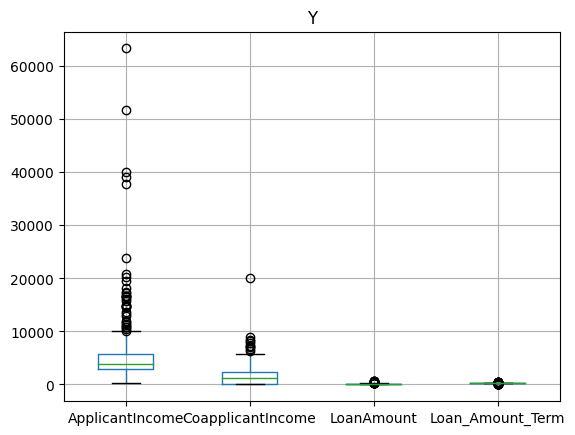

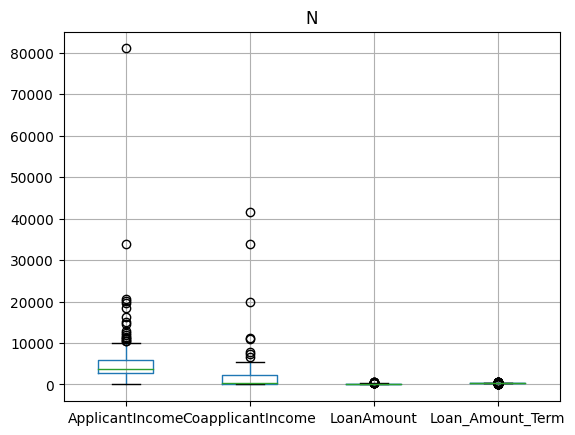

In [456]:
for i in df['Loan_Status'].unique():
    df[df['Loan_Status']==i].select_dtypes(include=['int64','float64']).boxplot()
    plt.title(i)
    plt.show()

In [457]:
for i in df['Loan_Status'].unique():
    for j in df.select_dtypes(include=['int64','float64']).columns[:-1]:
        temp=df[df['Loan_Status']==i]
        Q1=temp[j].quantile(0.25)
        Q3=temp[j].quantile(0.75)
        IQR=Q3-Q1
        outliers=temp[(temp[j]>Q3+1.5*IQR) | (temp[j]<Q1-1.5*IQR)]
        df.drop(outliers.index,inplace=True,axis=0)
        df.reset_index(inplace=True,drop=True)

print(len(df))

520


EDA

Univariate analysis(Overall analysis)

In [458]:
df.iloc[:,:-1].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,520.000000,520.000000,520.000000,520.000000
mean,4003.730769,1310.526769,124.375468,342.092308
std,1808.424971,1394.773949,40.029368,65.554395
min,150.000000,0.000000,25.000000,12.000000
25%,2724.500000,0.000000,100.000000,360.000000
50%,3590.500000,1283.500000,123.000000,360.000000
75%,4772.750000,2173.000000,150.000000,360.000000
max,10047.000000,5701.000000,244.000000,480.000000


In [459]:
df.select_dtypes(include=['object','category']).describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,520,520,520,520,520,520.0,520,520
unique,2,2,4,2,2,2.0,3,2
top,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,422,335,316,389,461,443.0,198,361


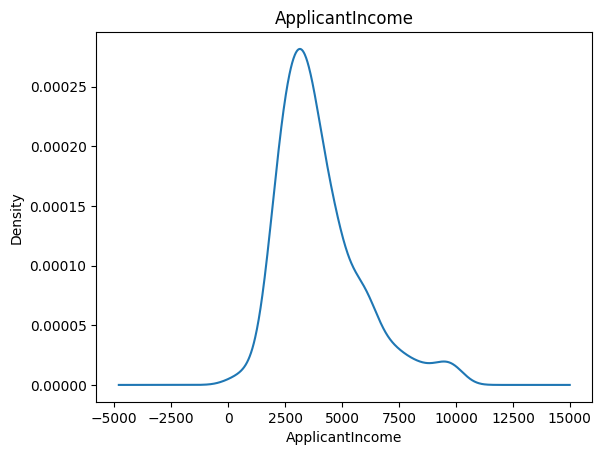

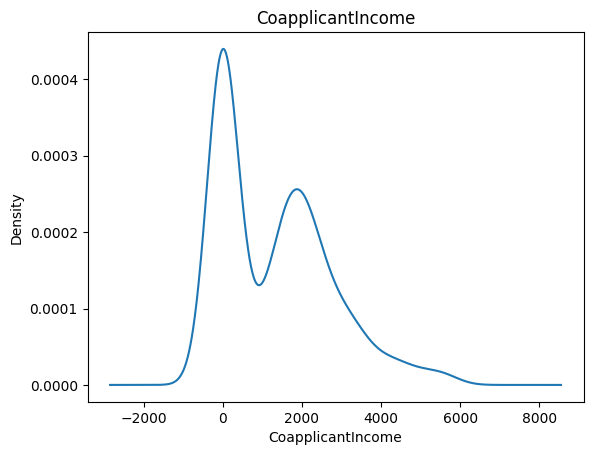

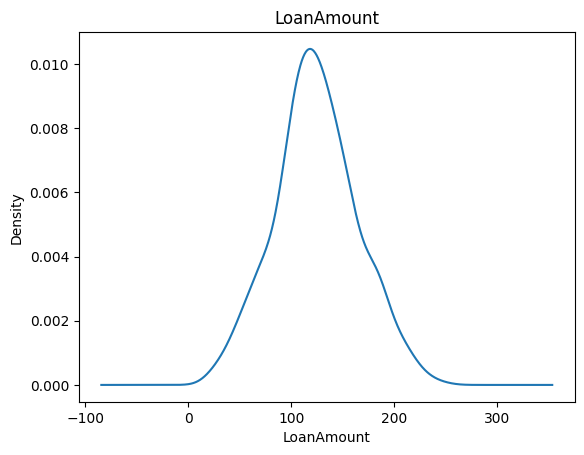

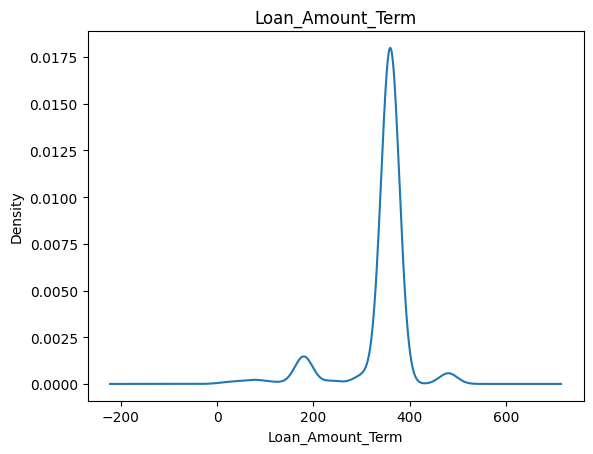

In [460]:
for i in df.select_dtypes(include=['int64','float64']).columns:
    df.loc[:,i].plot(kind='kde')
    plt.title(i)
    plt.xlabel(i)
    plt.show()

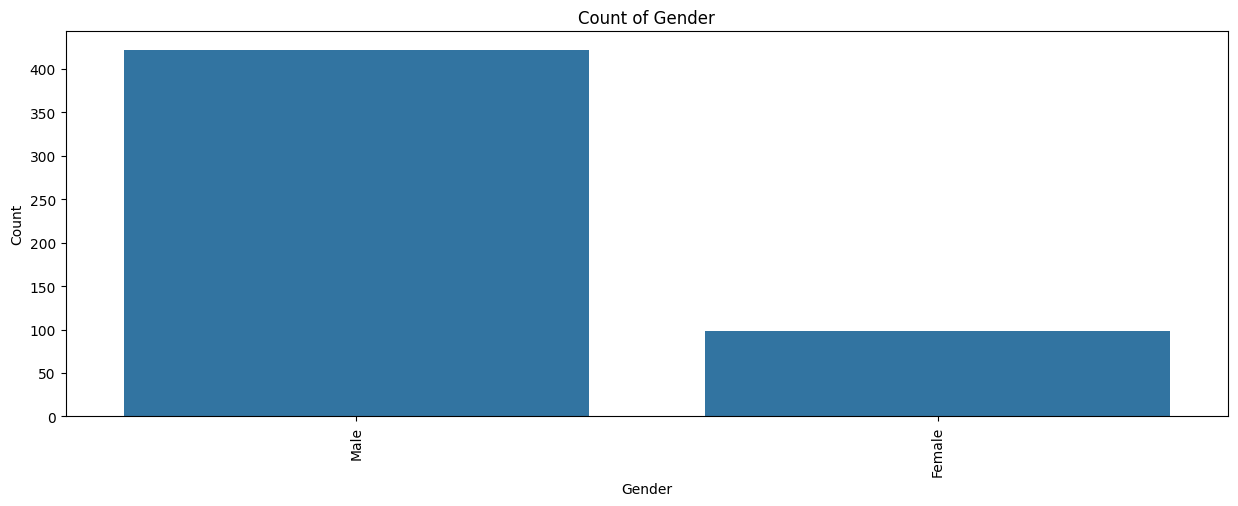

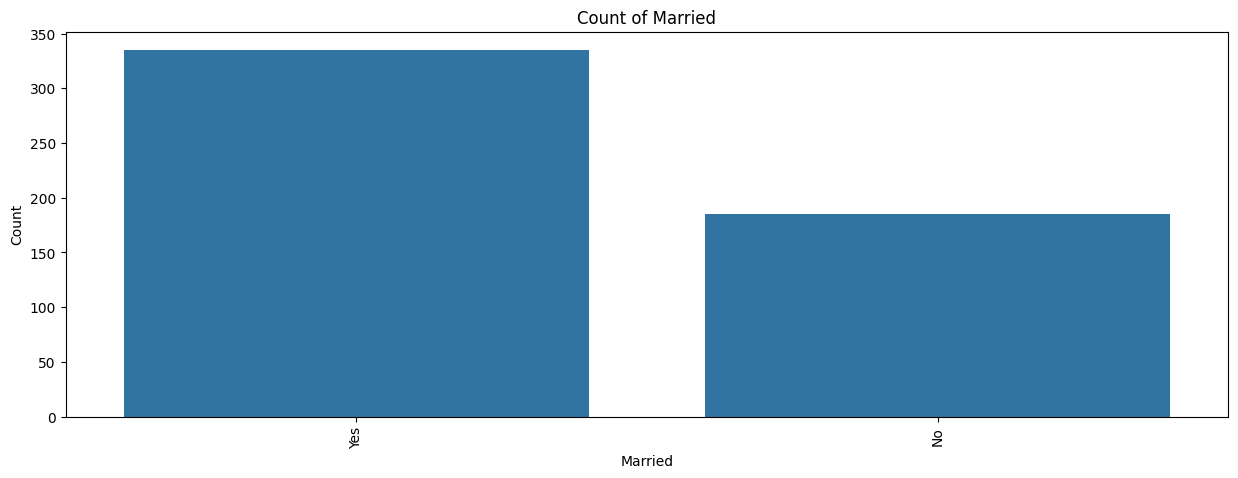

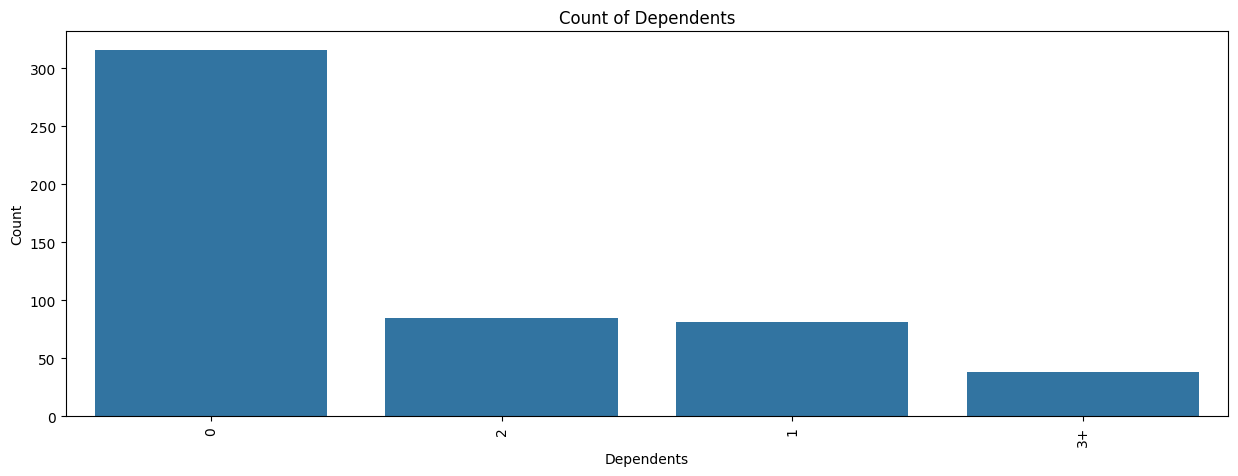

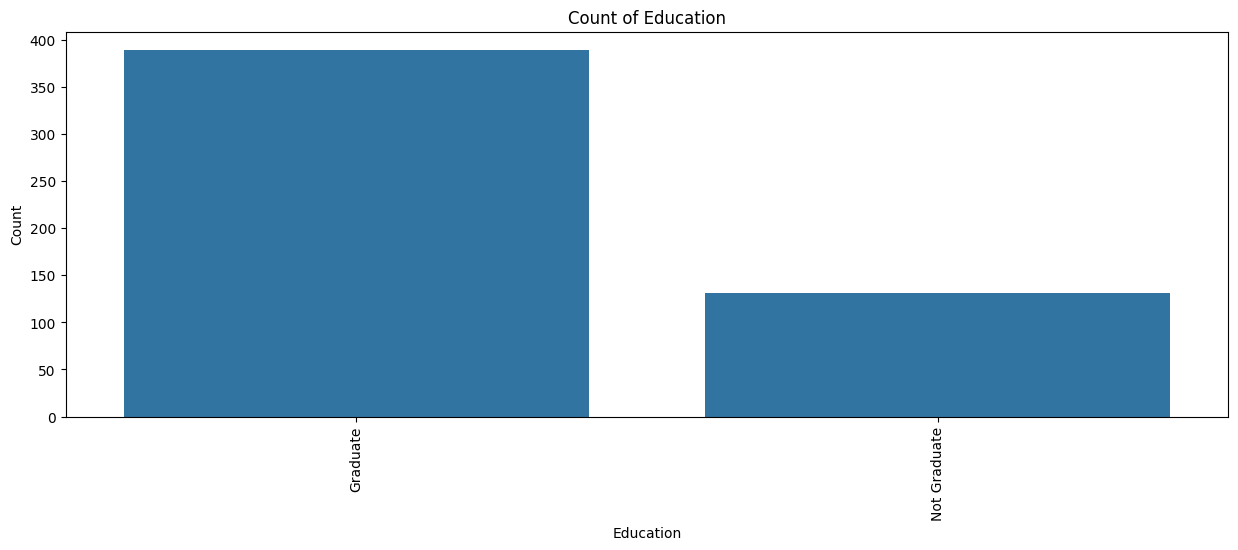

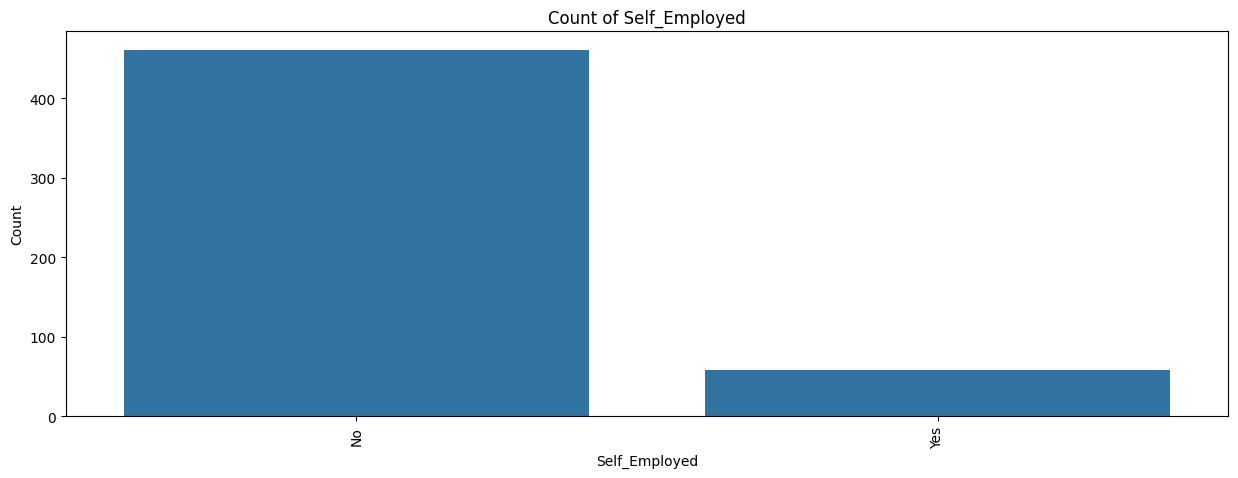

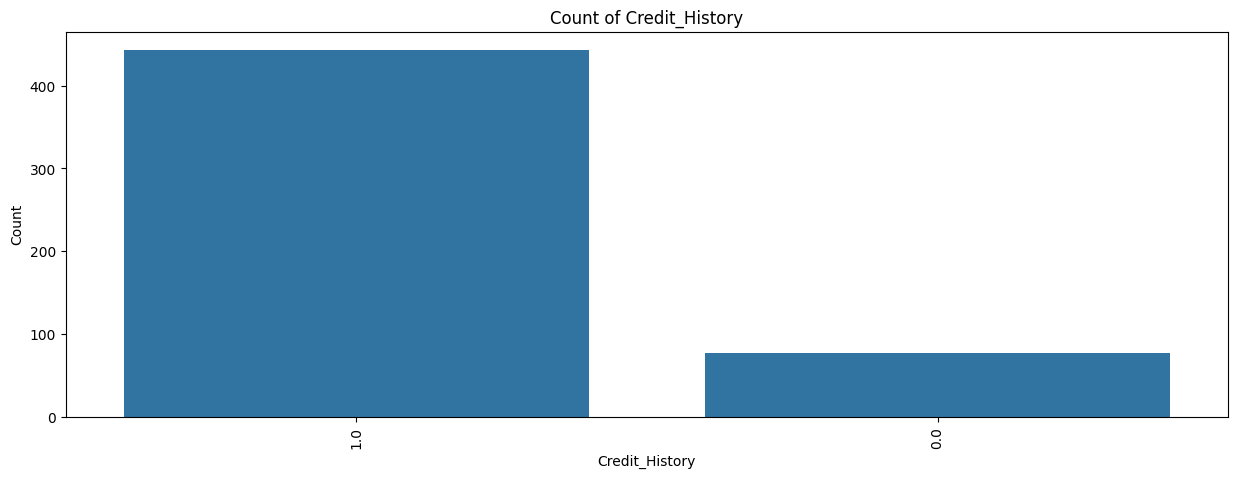

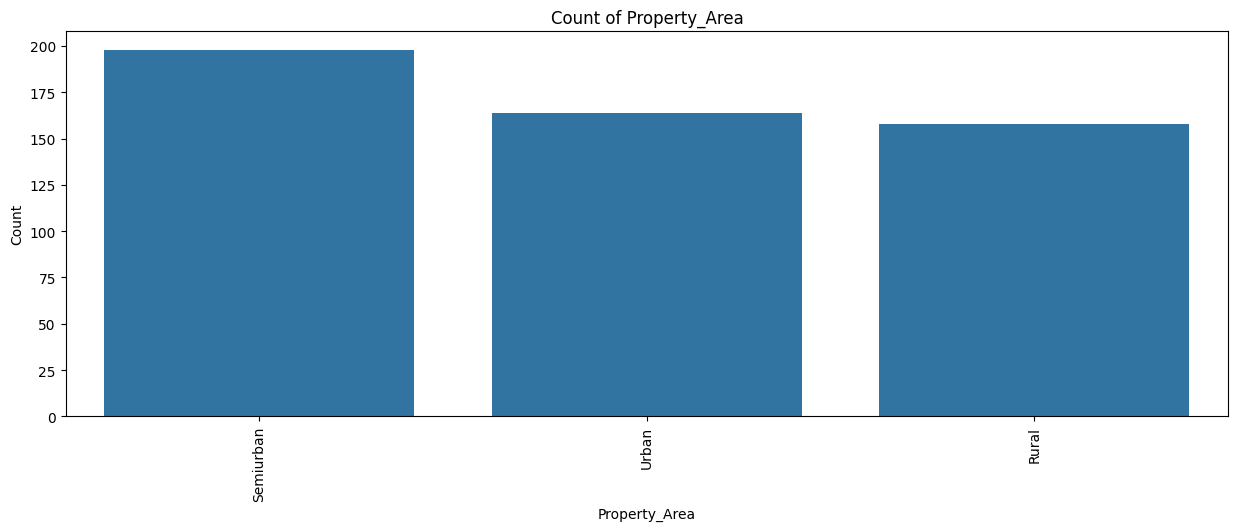

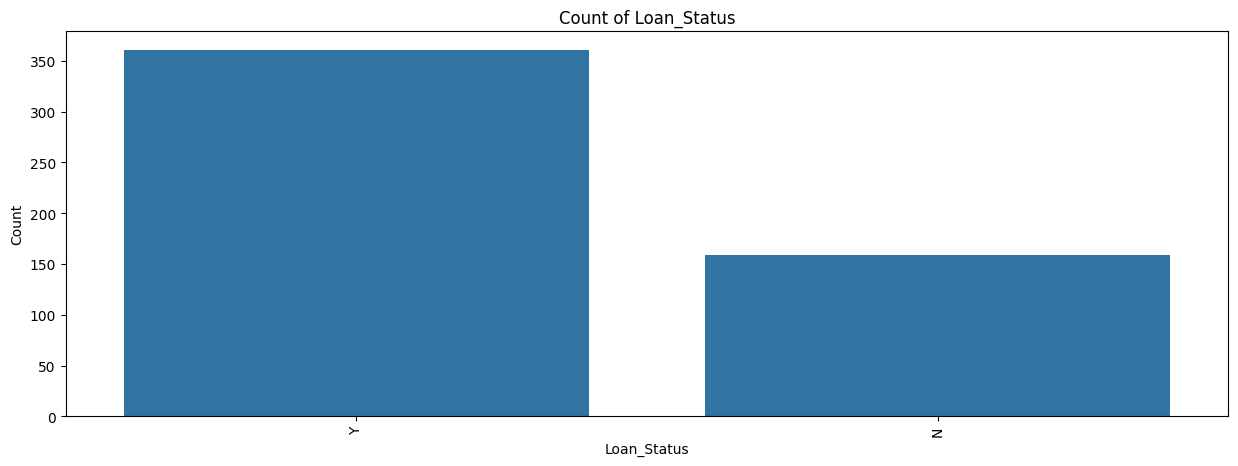

In [461]:
for i in df.select_dtypes(include=['object','category']).columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(df,x=i,order=df[i].value_counts().index)
    plt.title(f'Count of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

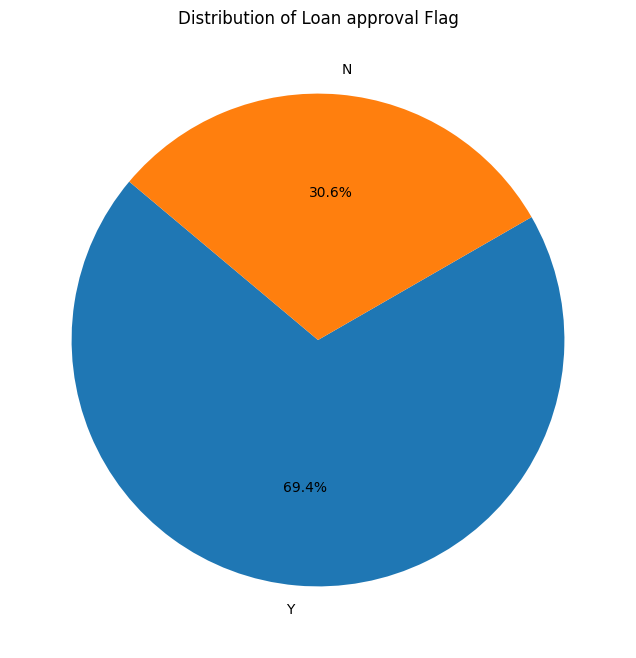

In [462]:
loan_counts = df['Loan_Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan approval Flag')
plt.show()

Univariate analysis(classwise)

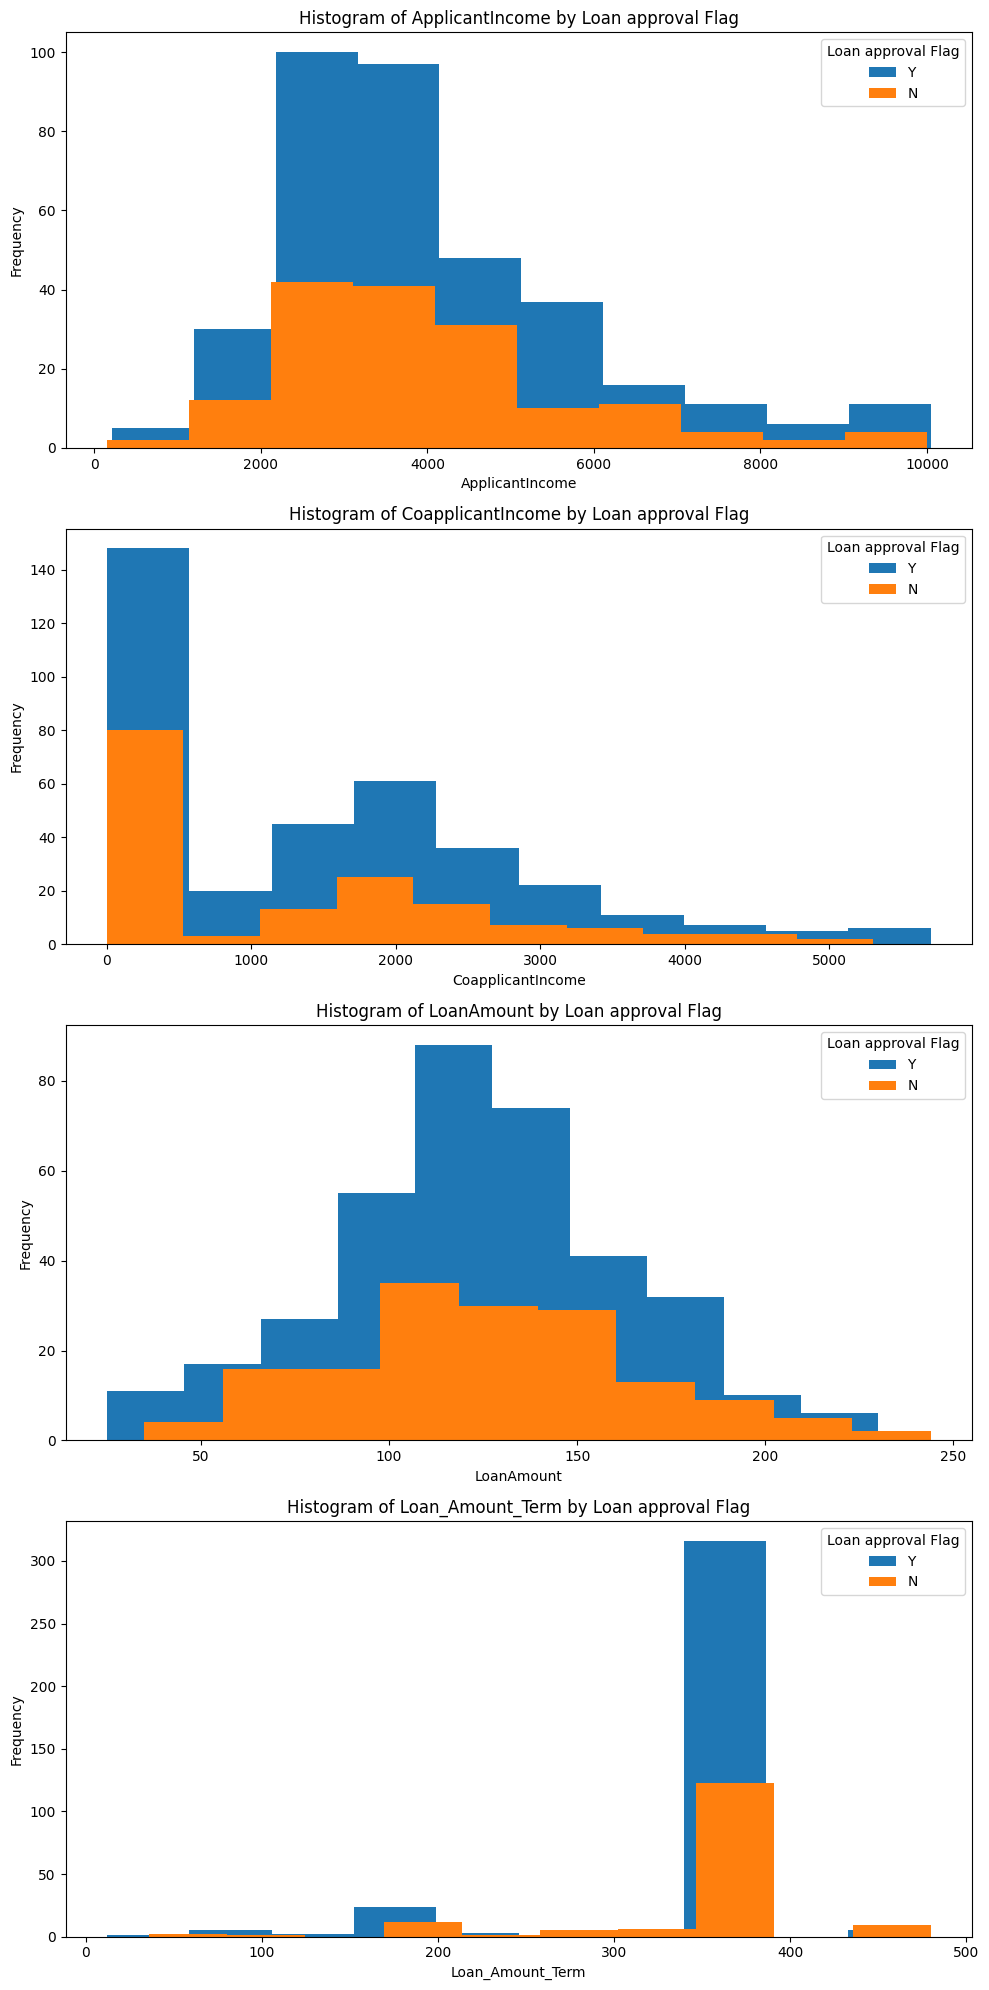

In [463]:
features=df.select_dtypes(include=['int64','float64']).columns
num_features = len(features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

for i, feature in enumerate(features):
    for j in df['Loan_Status'].unique():
        axes[i].hist(df[df['Loan_Status'] == j][feature],label=str(j))
    axes[i].set_title(f'Histogram of {feature} by Loan approval Flag')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Loan approval Flag')

plt.tight_layout()
plt.show()

<ipython-input-464-061f8f019c0b>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-464-061f8f019c0b>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-464-061f8f019c0b>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-464-061f8f019c0b>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-464-061f8f019c0b>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-464-061f8f019c0b>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-464-061f8f019c0b>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-464-061f8f019c0b>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



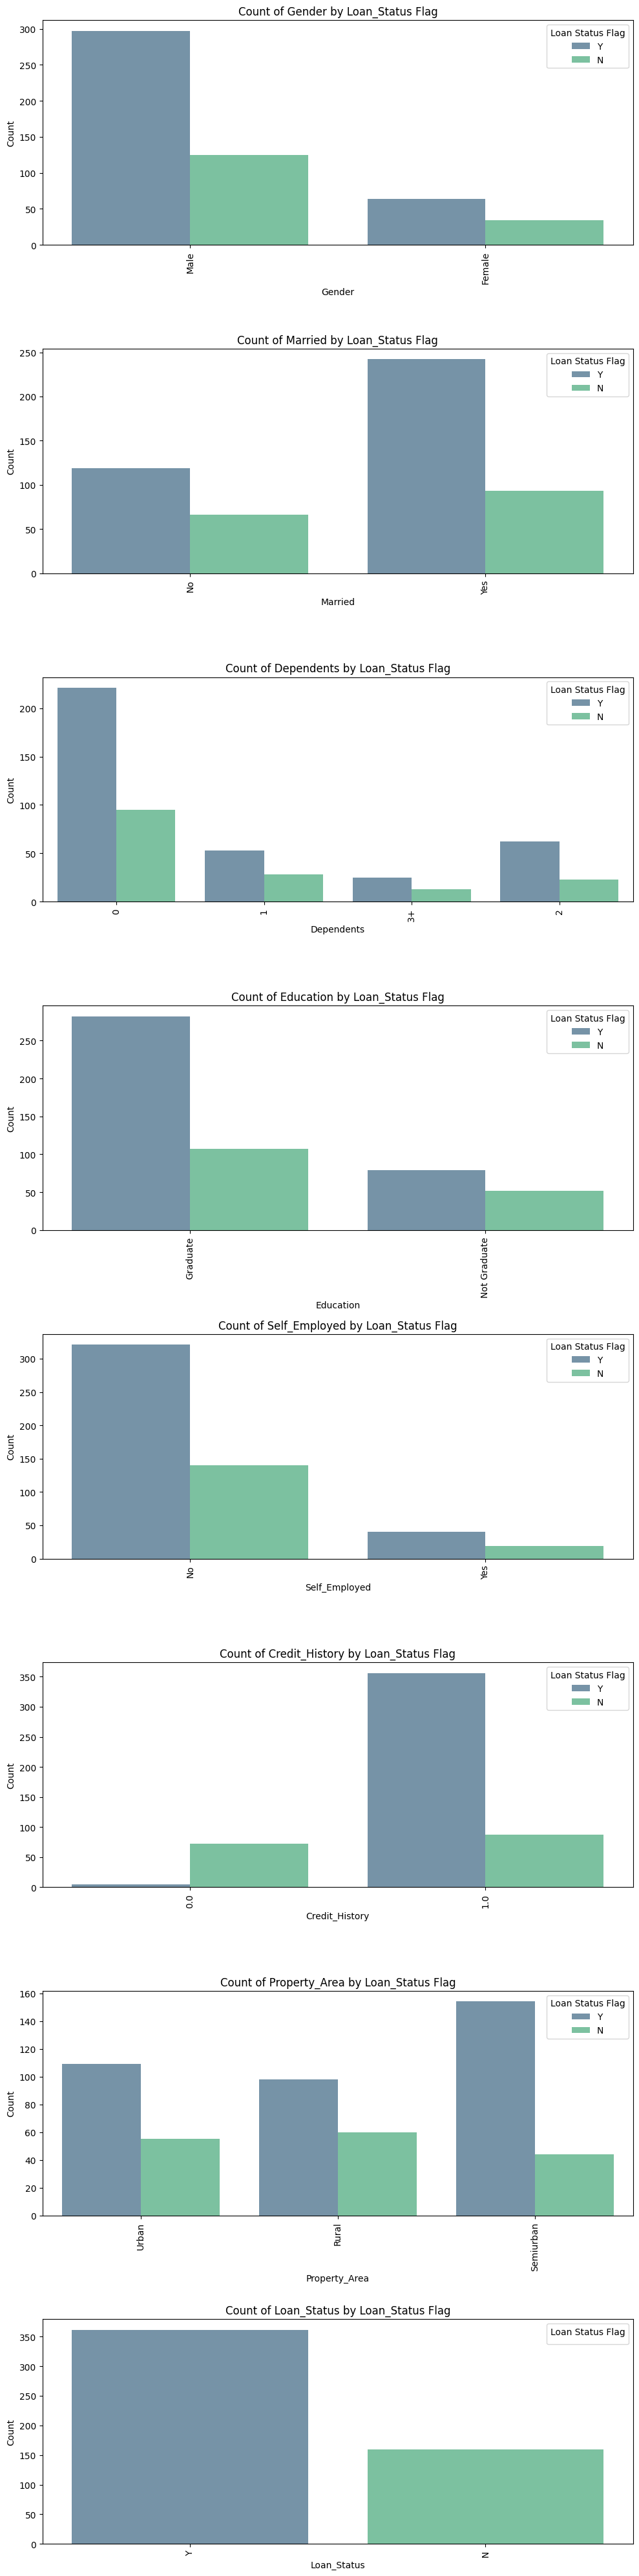

In [464]:
features=df.select_dtypes(include=['object','category']).columns
num_features = len(features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

for i, feature in enumerate(features):
    sns.countplot(data=df, x=feature, hue='Loan_Status', ax=axes[i], palette='viridis', alpha=0.7)
    axes[i].set_title(f'Count of {feature} by Loan_Status Flag')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Loan Status Flag')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Multivariate analysis

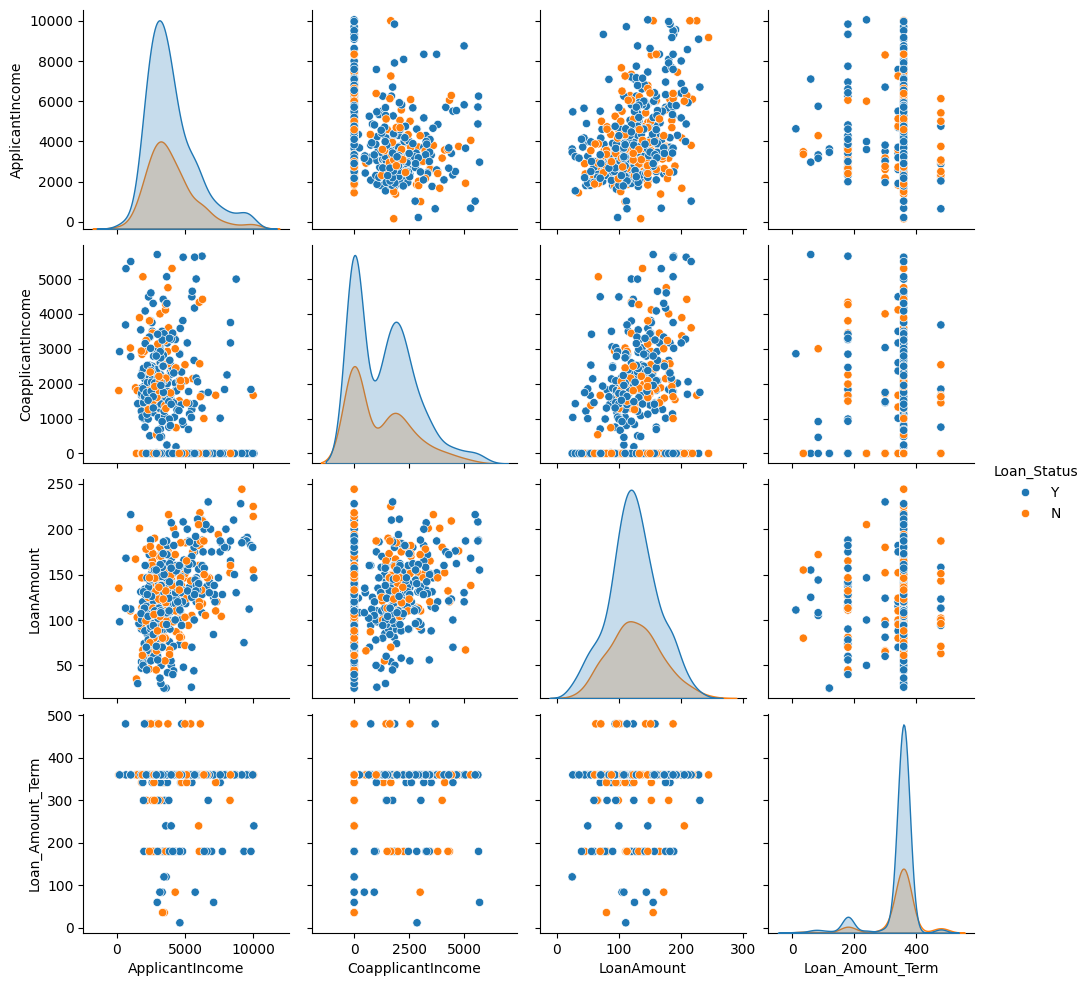

In [465]:
sns.pairplot(df,hue='Loan_Status')
plt.show()

In [466]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [467]:
fig=px.scatter_3d(df,x='ApplicantIncome',y='CoapplicantIncome',z='LoanAmount',color='Loan_Status')
fig.show()

Data preprocessing

In [468]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,361
N,159


In [469]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [470]:
from sklearn.preprocessing import LabelEncoder

gender_le=LabelEncoder()
married_le=LabelEncoder()
education_le=LabelEncoder()
self_emp_le=LabelEncoder()
credit_le=LabelEncoder()
loan_le=LabelEncoder()
df['Gender']=gender_le.fit_transform(df['Gender'])
df['Married']=married_le.fit_transform(df['Married'])
df['Education']=education_le.fit_transform(df['Education'])
df['Self_Employed']=self_emp_le.fit_transform(df['Self_Employed'])
df['Credit_History']=credit_le.fit_transform(df['Credit_History'])
df['Loan_Status']=loan_le.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,Urban,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,Rural,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,Urban,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,Urban,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,Urban,1


In [471]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['Dependents','Property_Area'])],remainder='passthrough')
temp=ct.fit_transform(df)
ohe = OneHotEncoder()
ohe.fit(df[['Dependents','Property_Area']])
encoded_columns = ohe.get_feature_names_out(['Dependents','Property_Area']).tolist()
df=pd.DataFrame(temp,columns=encoded_columns+list(df.columns[:2])+list(df.columns[3:10])+list(df.columns[11:12]))
df.head()


,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,1.0


In [472]:
from imblearn.over_sampling import SMOTE
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Loan_Status'] = y_resampled

df_resampled['Loan_Status'].value_counts()

,count
Loan_Status,
1.0,361
0.0,361


In [473]:
df=df_resampled.copy()

In [474]:
df.columns

Index(['Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents_0             722 non-null    float64
 1   Dependents_1             722 non-null    float64
 2   Dependents_2             722 non-null    float64
 3   Dependents_3+            722 non-null    float64
 4   Property_Area_Rural      722 non-null    float64
 5   Property_Area_Semiurban  722 non-null    float64
 6   Property_Area_Urban      722 non-null    float64
 7   Gender                   722 non-null    float64
 8   Married                  722 non-null    float64
 9   Education                722 non-null    float64
 10  Self_Employed            722 non-null    float64
 11  ApplicantIncome          722 non-null    float64
 12  CoapplicantIncome        722 non-null    float64
 13  LoanAmount               722 non-null    float64
 14  Loan_Amount_Term         7

In [476]:
df[['Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+','Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban','Gender', 'Married', 'Education', 'Self_Employed','Credit_History']]=df[['Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+','Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban','Gender', 'Married', 'Education', 'Self_Employed','Credit_History']].astype('int64')
df['Loan_Status']=df['Loan_Status'].astype('category')

In [477]:
for i in df['Loan_Status'].unique():
    for j in df.select_dtypes(include=['float64']).columns:
        temp=df[df['Loan_Status']==i]
        Q1=temp[j].quantile(0.25)
        Q3=temp[j].quantile(0.75)
        IQR=Q3-Q1
        outliers=temp[(temp[j]>Q3+1.5*IQR) | (temp[j]<Q1-1.5*IQR)]
        df.drop(outliers.index,inplace=True,axis=0)
        df.reset_index(inplace=True,drop=True)

print(len(df))

518


In [478]:
df.isnull().sum()

,0
Dependents_0,0
Dependents_1,0
Dependents_2,0
Dependents_3+,0
Property_Area_Rural,0
Property_Area_Semiurban,0
Property_Area_Urban,0
Gender,0
Married,0
Education,0


In [479]:
df.iloc[:,:-1].corr()

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents_0,1.000000,-0.405645,-0.463943,-0.260364,0.072396,0.047124,0.028867,-0.126160,-0.227425,0.020390,-0.038573,-0.112442,0.079108,-0.114111,NaN,0.110106
Dependents_1,-0.405645,1.000000,-0.152663,-0.085674,-0.029195,0.052357,0.064803,0.007818,0.099751,0.011797,0.107159,-0.036186,-0.003716,0.025746,NaN,0.143668
Dependents_2,-0.463943,-0.152663,1.000000,-0.097987,0.039772,0.033316,0.033490,0.157926,0.251398,0.030996,0.031630,0.055983,-0.008120,0.077869,NaN,0.030874
Dependents_3+,-0.260364,-0.085674,-0.097987,1.000000,-0.011777,0.059115,0.004486,0.104369,0.161471,0.066714,0.055362,0.048405,-0.011319,0.034629,NaN,0.016548
Property_Area_Rural,0.072396,-0.029195,0.039772,-0.011777,1.000000,-0.435949,-0.362628,0.097188,0.002759,0.119165,0.060349,0.131364,0.045720,0.068289,NaN,0.048596
Property_Area_Semiurban,0.047124,0.052357,0.033316,0.059115,-0.435949,1.000000,-0.402797,-0.084024,0.057019,-0.005407,0.059265,-0.049356,0.005288,-0.013632,NaN,0.111206
Property_Area_Urban,0.028867,0.064803,0.033490,0.004486,-0.362628,-0.402797,1.000000,0.052079,0.069688,-0.044434,-0.028912,-0.128774,0.009626,-0.062004,NaN,0.131901
Gender,-0.126160,0.007818,0.157926,0.104369,0.097188,-0.084024,0.052079,1.000000,0.372542,0.066178,0.026035,0.054792,0.263680,0.226864,NaN,0.073919
Married,-0.227425,0.099751,0.251398,0.161471,0.002759,0.057019,0.069688,0.372542,1.000000,0.040670,0.025074,-0.135008,0.347834,0.226126,NaN,0.071078
Education,0.020390,0.011797,0.030996,0.066714,0.119165,-0.005407,-0.044434,0.066178,0.040670,1.000000,0.045938,-0.054556,-0.007261,-0.008959,NaN,0.057442


In [480]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt=DecisionTreeClassifier()
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt.fit(X_train,y_train)
print(accuracy_score(y_test,dt.predict(X_test)))


0.8173076923076923


Implementing differential privacy

In [481]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [482]:
data=df.copy()

In [483]:
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [484]:
print(y_train.value_counts())


Loan_Status
1.0    234
0.0    180
Name: count, dtype: int64


In [486]:
df.select_dtypes(include=['float64']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [487]:
def add_laplace_noise(data, sensitivity, epsilon):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale, data.shape)
    noisy_data = data.copy()
    continuous_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
    noisy_data[continuous_cols] += noise[:, :len(continuous_cols)]
    binary_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

    for i, col in enumerate(binary_columns, start=len(continuous_cols)):
        noisy_data[col] = np.clip(noisy_data[col] + noise[:, i], 0, 1).astype(float)
        noisy_data[col] = noisy_data[col].round().astype(int)

    return noisy_data

In [488]:
def add_gaussian_noise(data, sensitivity, epsilon):
    sigma = sensitivity / epsilon  # Standard deviation for Gaussian noise
    noise = np.random.normal(0, sigma, data.shape)
    noisy_data = data.copy()
    continuous_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
    noisy_data[continuous_cols] += noise[:, :len(continuous_cols)]
    binary_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

    for i, col in enumerate(binary_columns, start=len(continuous_cols)):
        noisy_data[col] = np.clip(noisy_data[col] + noise[:, i], 0, 1).astype(float)
        noisy_data[col] = noisy_data[col].round().astype(int)
    return noisy_data

In [489]:
def evaluate_utility(noisy_X_train, noisy_X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(noisy_X_train, y_train)
    y_pred = clf.predict(noisy_X_test)
    return accuracy_score(y_test, y_pred)

In [490]:
sensitivity = 1
epsilon_values = np.linspace(0.1, 30, 10)
accuracies = []

for epsilon in epsilon_values:
    noisy_X_train = add_gaussian_noise(X_train, sensitivity, epsilon)
    noisy_X_train = pd.DataFrame(noisy_X_train, columns=X.columns)

    noisy_X_test = add_gaussian_noise(X_test, sensitivity, epsilon)
    noisy_X_test = pd.DataFrame(noisy_X_test, columns=X.columns)

    accuracy = evaluate_utility(noisy_X_train, noisy_X_test, y_train, y_test)
    accuracies.append(accuracy)
    print(f"Epsilon: {epsilon}, Accuracy: {accuracy}")

Epsilon: 0.1, Accuracy: 0.6442307692307693
Epsilon: 3.422222222222222, Accuracy: 0.8269230769230769
Epsilon: 6.744444444444444, Accuracy: 0.8557692307692307
Epsilon: 10.066666666666665, Accuracy: 0.8269230769230769
Epsilon: 13.388888888888888, Accuracy: 0.8557692307692307
Epsilon: 16.711111111111112, Accuracy: 0.875
Epsilon: 20.03333333333333, Accuracy: 0.7692307692307693
Epsilon: 23.355555555555554, Accuracy: 0.8365384615384616
Epsilon: 26.677777777777777, Accuracy: 0.8461538461538461
Epsilon: 30.0, Accuracy: 0.8557692307692307


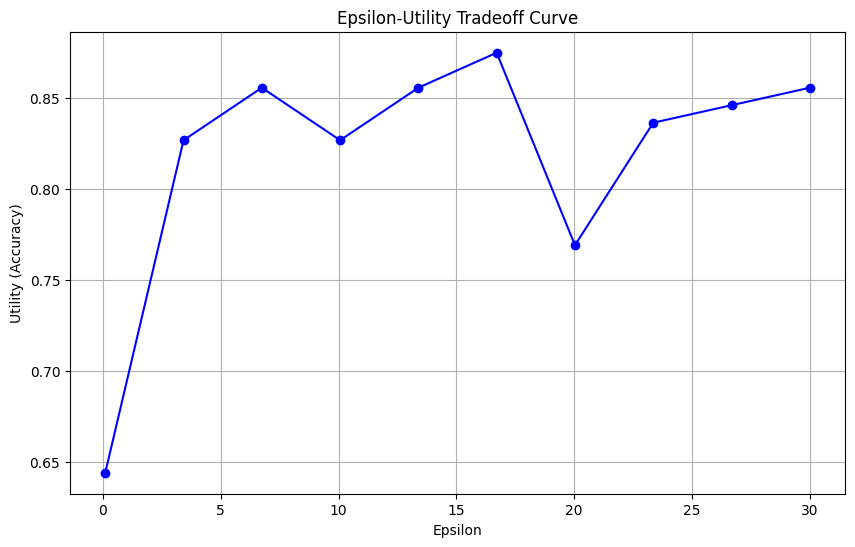

Optimal Epsilon: 16.71


In [491]:
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Epsilon')
plt.ylabel('Utility (Accuracy)')
plt.title('Epsilon-Utility Tradeoff Curve')
plt.grid(True)
plt.show()

optimal_index = np.argmax(accuracies)
optimal_epsilon = epsilon_values[optimal_index]
print(f"Optimal Epsilon: {optimal_epsilon:.2f}")

In [492]:
noisy_X_train = add_gaussian_noise(X_train, sensitivity,optimal_epsilon)
noisy_X_test = add_gaussian_noise(X_test, sensitivity,optimal_epsilon)

In [493]:
noisy_X_train

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
405,1,0,0,0,0,1,0,0,0,0,1,4582.896508,-0.024715,132.972022,360.066224,0
331,1,0,0,0,1,0,0,1,1,1,0,2600.014679,1699.885040,106.943849,360.032822,1
220,1,0,0,0,0,1,0,1,1,0,1,5817.963278,2159.968440,183.959672,359.973607,1
148,1,0,0,0,0,1,0,1,1,0,0,6249.982099,-0.026323,127.941583,360.027659,1
301,1,0,0,0,1,0,0,1,1,0,0,3947.983373,1733.155594,149.051290,360.058808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,0,0,0,1,0,1,1,0,0,4651.995499,3583.124561,146.402456,360.009384,1
106,0,1,0,0,1,0,0,1,1,0,0,6000.067132,0.093791,159.909684,359.994976,1
270,1,0,0,0,0,0,1,1,1,1,0,2167.016990,2400.114628,114.948760,359.990936,1
435,0,0,0,0,0,0,0,1,1,1,0,4893.160895,-0.121002,132.275771,359.996588,1


In [494]:
from sklearn.preprocessing import StandardScaler
col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
ss=StandardScaler()
noisy_X_train[col]=ss.fit_transform(noisy_X_train[col])
noisy_X_test[col]=ss.transform(noisy_X_test[col])
noisy_X_train.head()

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
405,1,0,0,0,0,1,0,0,0,0,1,0.542251,-0.969573,0.243332,1.104951,0
331,1,0,0,0,1,0,0,1,1,1,0,-0.827096,0.368375,-0.496608,0.553353,1
220,1,0,0,0,0,1,0,1,1,0,1,1.395169,0.730492,1.692829,-0.424525,1
148,1,0,0,0,0,1,0,1,1,0,0,1.693514,-0.969574,0.100324,0.468094,1
301,1,0,0,0,1,0,0,1,1,0,0,0.103790,0.394561,0.700440,0.982491,0


Training models on the differentially private data

In [495]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve,auc

Accuracy: 0.8942307692307693
Precision: 0.9050653294074347
Recall: 0.8942307692307693
F1 Score: 0.8925008277232093


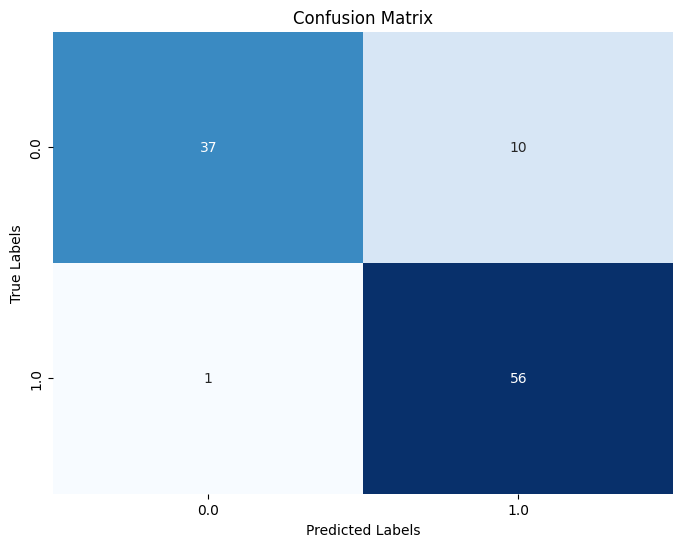

In [499]:
LR=LogisticRegression(penalty='l2')
LR.fit(noisy_X_train,y_train)
y_pred=LR.predict(noisy_X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=list(data['Loan_Status'].unique())[::-1], yticklabels=list(data['Loan_Status'].unique())[::-1])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [500]:
print(y_test.value_counts())

Loan_Status
1.0    57
0.0    47
Name: count, dtype: int64


Accuracy: 0.7788461538461539
Precision: 0.7867735042735042
Recall: 0.7788461538461539
F1 Score: 0.7792758966766554


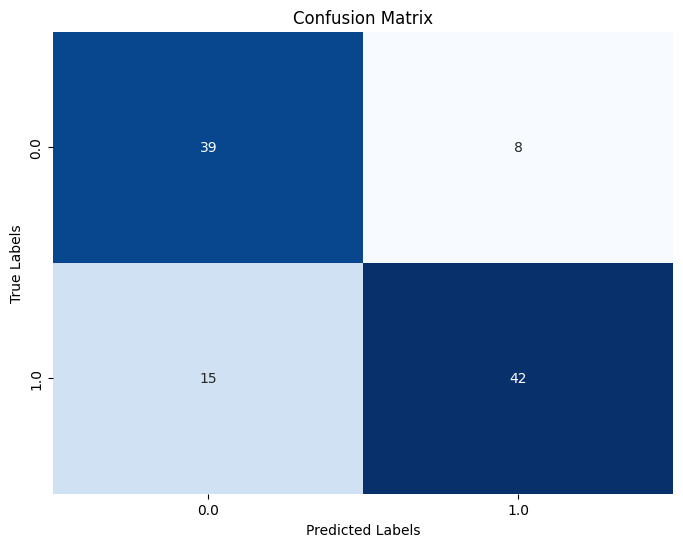

In [501]:
DT=DecisionTreeClassifier(criterion='entropy',min_samples_split=2)
DT.fit(noisy_X_train,y_train)
y_pred=DT.predict(noisy_X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=list(data['Loan_Status'].unique())[::-1], yticklabels=list(data['Loan_Status'].unique())[::-1])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.8461538461538461
Precision: 0.8460959003331886
Recall: 0.8461538461538461
F1 Score: 0.8458078652981201


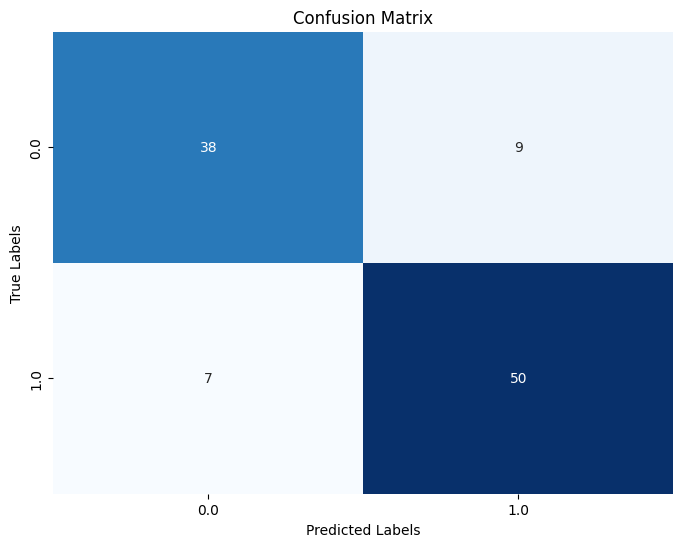

In [502]:
RF=RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: 2})
RF.fit(noisy_X_train,y_train)
y_pred=RF.predict(noisy_X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=list(data['Loan_Status'].unique())[::-1], yticklabels=list(data['Loan_Status'].unique())[::-1])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [503]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(noisy_X_train,y_train)
y_pred=knn.predict(noisy_X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion_matrix(y_test, y_pred)

0.7788461538461539


array([[34, 13],
       [10, 47]])

In [504]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(noisy_X_train,y_train)
y_pred=svm.predict(noisy_X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

0.8557692307692307
[[34 13]
 [ 2 55]]


In [505]:
X_train = pd.concat([noisy_X_train, noisy_X_test], axis=0)
y_train = pd.concat([y_train, y_test], axis=0)


In [507]:
RF.fit(X_train,y_train)
y_pred=RF.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(accuracy)
confusion_matrix(y_train, y_pred)

1.0


array([[227,   0],
       [  0, 291]])

In [508]:
X.columns

Index(['Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [510]:
Dependents='2'
Property_Area='Urban'
Gender='Male'
Married='No'
Education='Graduate'
Self_Employed='No'
ApplicantIncome=300
CoapplicantIncome=0
Loanamount=100
Loanperiod=360
Credit_History=1
y='Y'

In [514]:
pred_data=pd.DataFrame([[Dependents,Property_Area,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loanamount,Loanperiod,Credit_History,y]],columns=['Dependents','Property_Area','Gender','Married', 'Education', 'Self_Employed', 'ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History','Loan_Status'])

In [512]:
len(pred_data.columns)

12

In [515]:
pred_data['Gender']=gender_le.fit_transform(pred_data['Gender'])
pred_data['Married']=married_le.fit_transform(pred_data['Married'])
pred_data['Education']=education_le.fit_transform(pred_data['Education'])
pred_data['Self_Employed']=self_emp_le.fit_transform(pred_data['Self_Employed'])
pred_data['Credit_History']=credit_le.fit_transform(pred_data['Credit_History'])
pred_data['Loan_Status']=loan_le.fit_transform(pred_data['Loan_Status'])

In [516]:
temp=ct.transform(pred_data)
pred_data=pd.DataFrame(temp,columns=df.columns)
pred_data[col]=ss.transform(pred_data[col])
pred_data

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.415451,-0.969554,-0.69401,0.011327,0.0,0.0


In [517]:
x=pred_data.drop('Loan_Status',axis=1)
y=RF.predict(x)
print(y)

[0.]


In [ ]:
!pip install shap lime scikit-learn

In [518]:
import lime
import lime.lime_tabular

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Predicted Class: 0.0
Probability of Predicted Class: 0.92
Local Feature Importance:
Credit_History <= 0.00: -0.491156795363402
Property_Area_Semiurban <= 0.00: -0.20501811369430475
Dependents_0 <= 0.00: -0.09166710049305299
CoapplicantIncome <= -0.97: -0.063712580517571
Property_Area_Urban > 0.75: 0.052306877564476356
Dependents_2 > 0.00: 0.03978344299579266
Dependents_3+ <= 0.00: -0.03740287633362155
Married <= 0.00: -0.037300122757972336
Property_Area_Rural <= 0.00: -0.03047958056459191
-0.01 < Loan_Amount_Term <= 0.65: -0.02223431067805187
Education <= 0.00: 0.019481607228284972
Dependents_1 <= 0.00: -0.016555393972531134
Self_Employed <= 0.00: -0.016313215198761364
ApplicantIncome <= -0.70: 0.011147726064009999
LoanAmount <= -0.69: 0.004127738763551408
Gender <= 1.00: 0.0


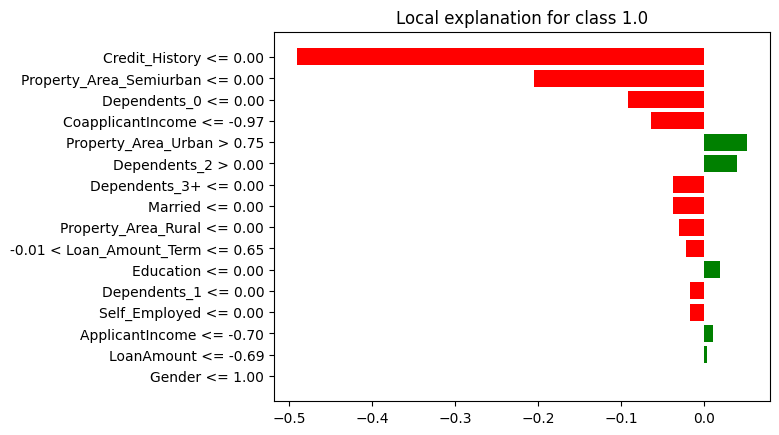

In [519]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=list(X_train.columns),
    class_names=list(df['Loan_Status'].unique())[::-1],
    mode='classification'
)


instance = x.values.reshape(-1)
explanation = explainer.explain_instance(
    instance,
    RF.predict_proba,
    num_features=len(pred_data.columns)
)

explanation.show_in_notebook(show_table=True)

print("Predicted Class:", RF.predict([instance])[0])
print("Probability of Predicted Class:", np.max(RF.predict_proba([instance])))
print("Local Feature Importance:")
for feature_name, weight in explanation.as_list():
  print(f"{feature_name}: {weight}")
fig = explanation.as_pyplot_figure()
plt.show()

In [520]:
import joblib
joblib.dump(RF, 'loan_approval_model.pkl')


['loan_approval_model.pkl']

In [ ]:
import json
metadata={'maping':map,'default':0.5,'scale_col':col,'columns':list(df.columns[:10])+['Risk_Flag']+[df.columns[10]]}
metadata_filename = 'metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f)

In [ ]:
joblib.dump(ct, "column_transformer.joblib")
joblib.dump(ss, "standard_scaler.joblib")
joblib.dump(noisy_X_train, "noisy_X_train.pkl")

In [ ]:
import sklearn
print(sklearn.__version__)
